# Classification Experiments

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import heatmap
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

## Gender

### Nouns, Adjectives, Both : split data into train and test  

In [19]:
df_nouns_we = pd.read_csv('../Data/FlauBERT_WE/all_nouns_we.csv').drop(columns=["number"])
df_adj_we = pd.read_csv('../Data/FlauBERT_WE/all_adjectives_we.csv').drop(columns = "number")
df_both_we = pd.concat([df_nouns_we, df_adj_we], ignore_index=True)

# target : gender
Y_gd_N = df_nouns_we["gender"]
Y_gd_A = df_adj_we["gender"]
Y_gd_both = df_both_we["gender"]

# features : word embeddings dimensions
X_gd_N = df_nouns_we.drop(columns=["Word", "gender"])
X_gd_A = df_adj_we.drop(columns=["Word", "gender"])
X_gd_both = df_both_we.drop(columns = ["Word", "gender"] )

# normalize data to be between 0 and 1
X_gd_N = (X_gd_N - X_gd_N.min()) / (X_gd_N.max() - X_gd_N.min())
X_gd_A = (X_gd_A - X_gd_A.min()) / (X_gd_A.max() - X_gd_A.min())
X_gd_both = (X_gd_both - X_gd_both.min()) / (X_gd_both.max() - X_gd_both.min())

# split data into train and test sets
X_gd_N_train, X_gd_N_test, Y_gd_N_train, Y_gd_N_test = train_test_split(X_gd_N, Y_gd_N, test_size=0.2, random_state=42)
X_gd_A_train, X_gd_A_test, Y_gd_A_train, Y_gd_A_test = train_test_split(X_gd_A, Y_gd_A, test_size=0.2, random_state=42)
X_gd_both_train, X_gd_both_test, Y_gd_both_train, Y_gd_both_test = train_test_split(X_gd_both, Y_gd_both, test_size=0.2, random_state=42)

In [20]:
# print shapes of train and test sets
print("X_gd_N_train shape : ", X_gd_N_train.shape)
print("X_gd_N_test shape : ", X_gd_N_test.shape)
print("X_gd_A_train shape : ", X_gd_A_train.shape)
print("X_gd_A_test shape : ", X_gd_A_test.shape)
print("X_gd_both_train shape : ", X_gd_both_train.shape)
print("X_gd_both_test shape : ", X_gd_both_test.shape)

X_gd_N_train shape :  (10590, 512)
X_gd_N_test shape :  (2648, 512)
X_gd_A_train shape :  (5067, 512)
X_gd_A_test shape :  (1267, 512)
X_gd_both_train shape :  (15657, 512)
X_gd_both_test shape :  (3915, 512)


In [21]:
train_features = [X_gd_N_train, X_gd_A_train, X_gd_both_train]
test_features = [X_gd_N_test, X_gd_A_test, X_gd_both_test]
train_targets = [Y_gd_N_train, Y_gd_A_train, Y_gd_both_train]
test_targets = [Y_gd_N_test, Y_gd_A_test, Y_gd_both_test]

###  Classifiers

#### 1. Decision Tree

In [43]:
# Execution time: ~30 sec

dt_results = []

for i in range(3):
    
    X_train, X_test, Y_train, Y_test = train_features[i], test_features[i], train_targets[i], test_targets[i]

    # Build a decision tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, Y_train)

    # Predict gender on the test set
    Y_pred = clf.predict(X_test)

    # Build a confusion matrix
    dt_results.append ({"cm": confusion_matrix(Y_test, Y_pred)})

    # Add the tree
    dt_results[i]["tree"] = clf

    # show the classes labels   
    dt_results[i]["classes"] = clf.classes_
    print(clf.classes_)

    # Compute precision, recall, F1 score and accuracy
    dt_results[i]["precision"] = dt_results[i]["cm"][0,0] / (dt_results[i]["cm"][0,0] + dt_results[i]["cm"][1,0])
    dt_results[i]["recall"] = dt_results[i]["cm"][0,0] / (dt_results[i]["cm"][0,0] + dt_results[i]["cm"][0,1])
    dt_results[i]["f1"] = 2 * dt_results[i]["precision"] * dt_results[i]["recall"] / (dt_results[i]["precision"] + dt_results[i]["recall"])
    dt_results[i]["accuracy"] = (dt_results[i]["cm"][0,0] + dt_results[i]["cm"][1,1]) / np.sum(dt_results[i]["cm"])

    # Store the importance of each feature
    dt_results[i]["importances"] = clf.feature_importances_

['feminine' 'masculine']
['feminine' 'masculine']
['feminine' 'masculine']


<BarContainer object of 512 artists>

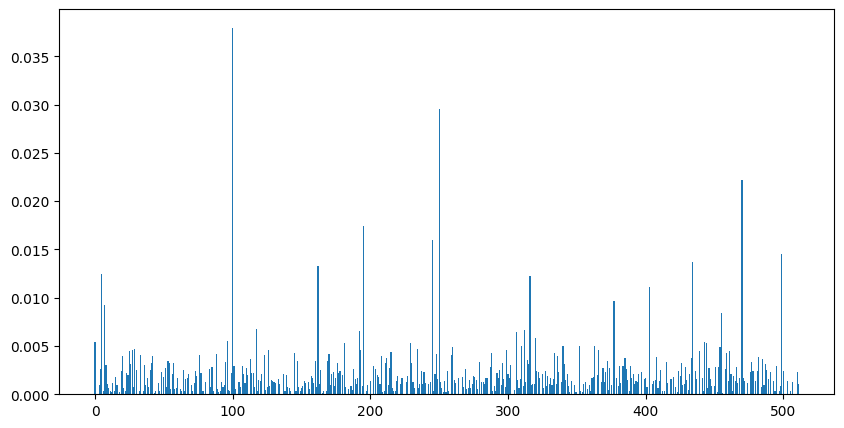

In [23]:
exp0importances = dt_results[0]["importances"]

# plot the importances
plt.figure(figsize=(10,5))
plt.bar(range(len(exp0importances)), exp0importances)

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance. ([source]("https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_"))

In [24]:
# compute the sum of importances
sum(exp0importances)

1.0000000000000004

In [26]:
# print the 10 most important features
indices = np.argsort(exp0importances)[::-1]
for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], dt_results[i]["importances"][indices[f]]))

print([int(ind) for ind in indices[:10]])

1. feature 100 (0.004242)
2. feature 250 (0.010856)
3. feature 470 (0.003462)
4. feature 195 (0.021118)
5. feature 245 (0.036454)
6. feature 499 (0.005407)
7. feature 434 (0.008801)
8. feature 162 (0.019093)
9. feature 5 (0.007376)
10. feature 316 (0.007058)
[100, 250, 470, 195, 245, 499, 434, 162, 5, 316]


Experiment 1:

Most important features:
-100: 0.037984051712959335
-250: 0.029527222164384928
-470: 0.022202497816713105
-195: 0.01741286098101748
-245: 0.016012662712746584
-499: 0.01454174737292816
-434: 0.013750378083788038
-162: 0.01326519884685847
-5: 0.012423671092871501
-316: 0.012264330052737285

Precision: 0.5983805668016194
Recall: 0.5930979133226324
F1 score: 0.5957275292220878
Accuracy: 0.6212235649546828


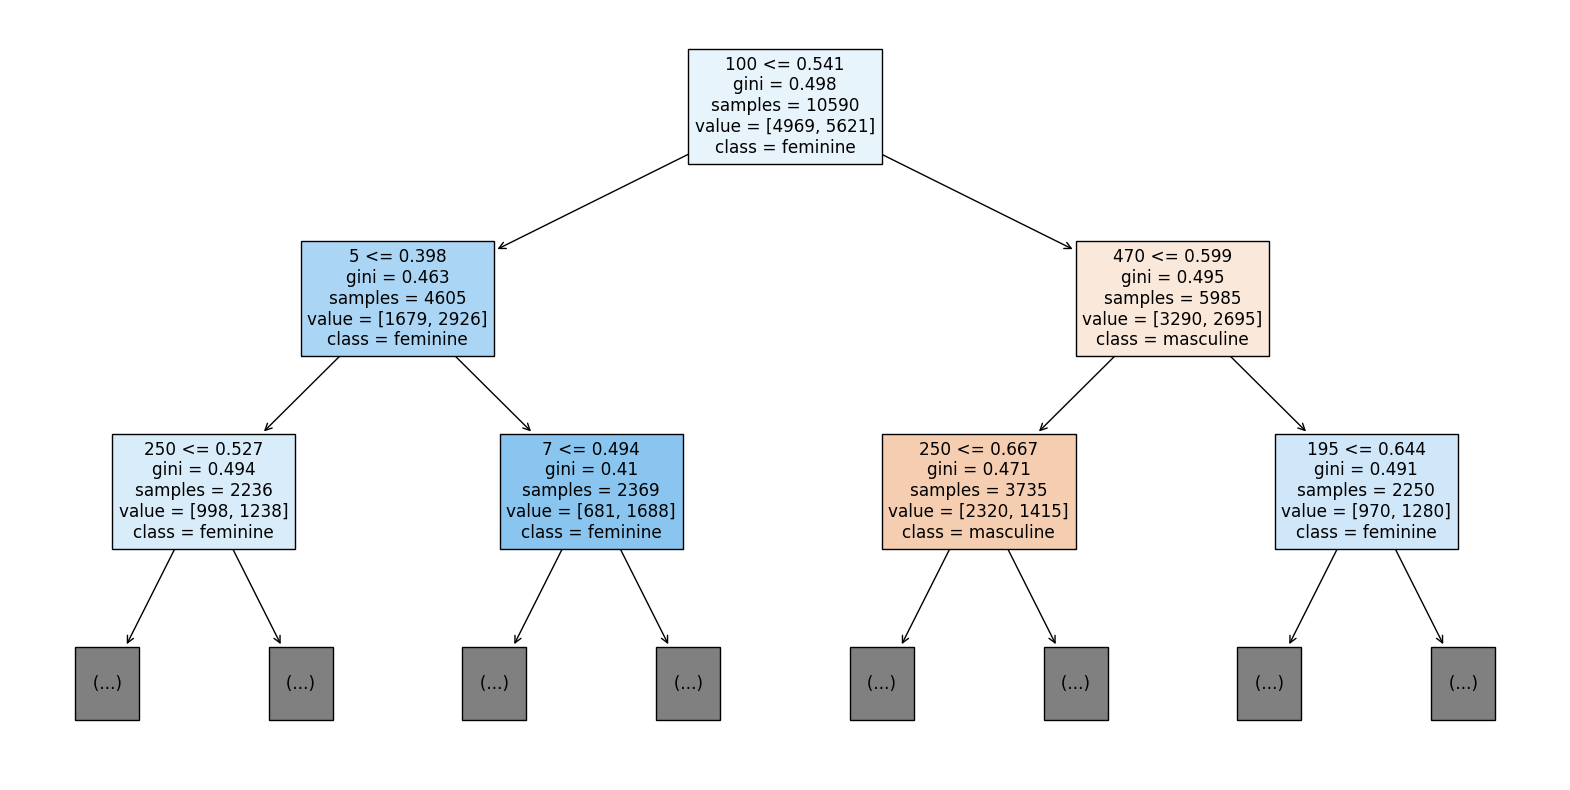

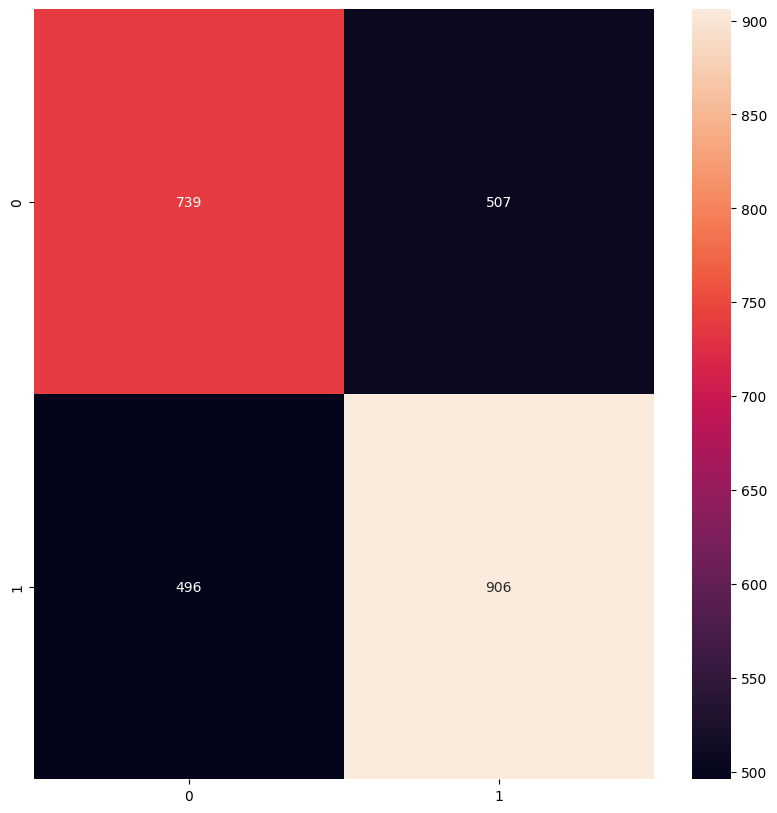

Experiment 2:

Most important features:
-466: 0.1077046133124288
-5: 0.06202348382063668
-507: 0.0483537626933636
-57: 0.03832155794945079
-234: 0.036286493037096024
-250: 0.036130625638088124
-379: 0.020676781447301184
-390: 0.019941516008718324
-511: 0.018099392859392386
-432: 0.016304586396199378

Precision: 0.659877800407332
Recall: 0.6849894291754757
F1 score: 0.6721991701244814
Accuracy: 0.7505919494869772


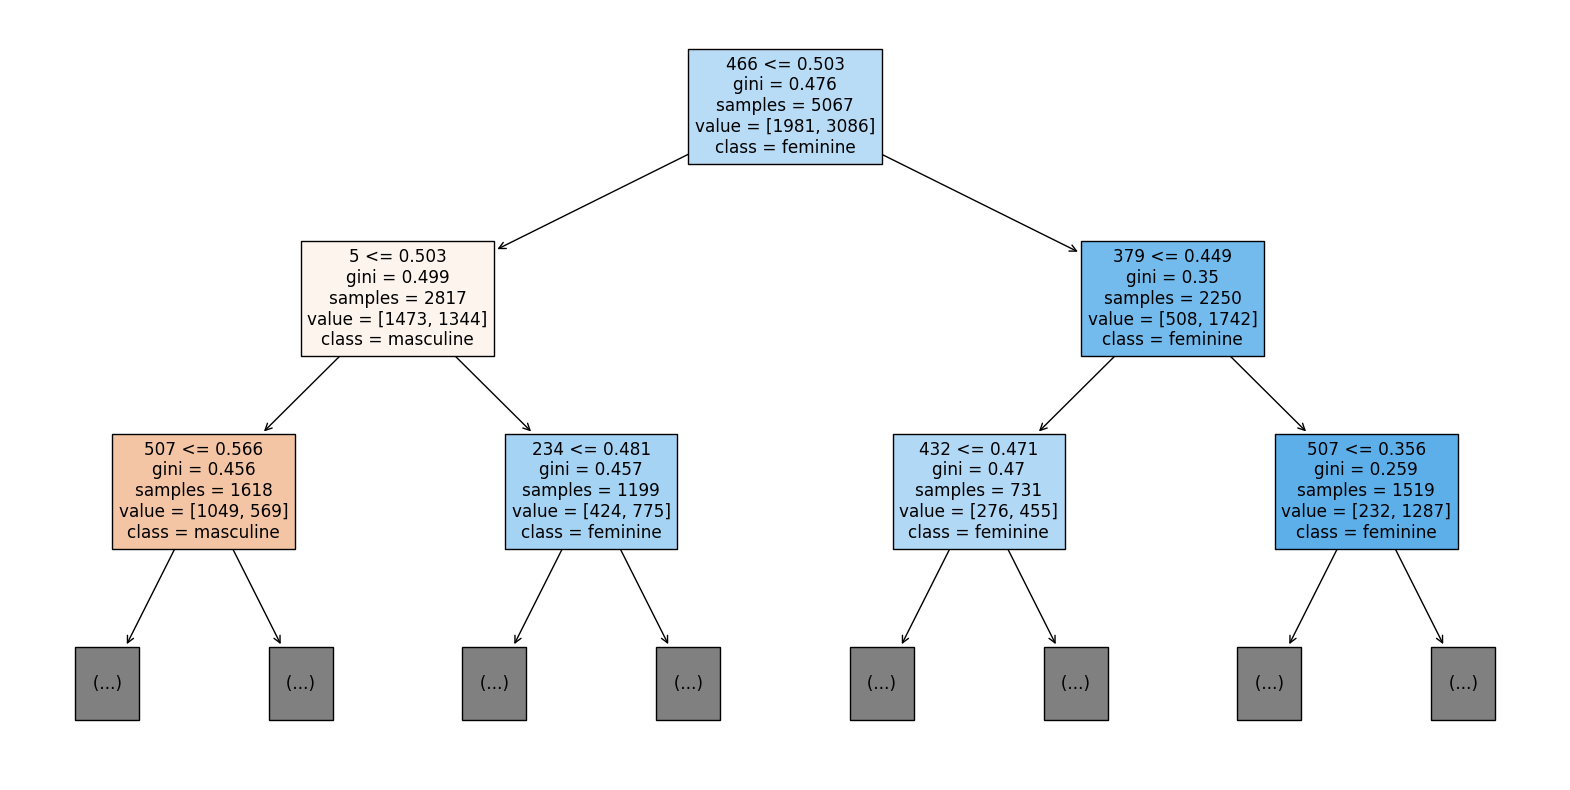

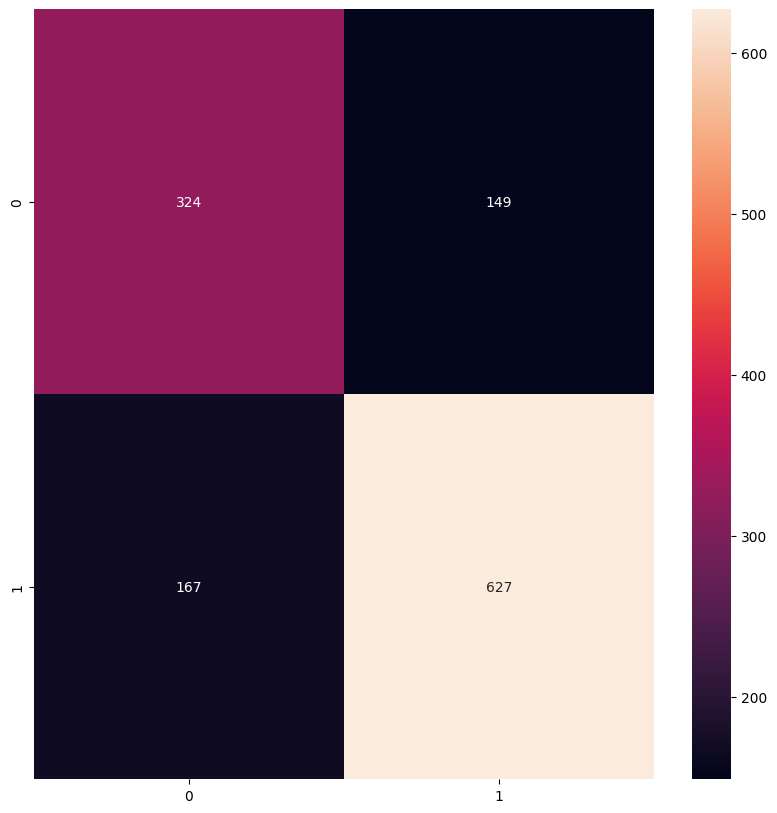

Experiment 3:

Most important features:
-245: 0.03645425397068175
-192: 0.02896151845532066
-195: 0.021117910669122834
-377: 0.02024841797630438
-162: 0.019092613018497056
-507: 0.018046224794508948
-133: 0.01766820322163825
-117: 0.013705605439974023
-121: 0.012211857401380283
-487: 0.010893313557448216

Precision: 0.6875732708089097
Recall: 0.6883802816901409
F1 score: 0.6879765395894429
Accuracy: 0.7282247765006385


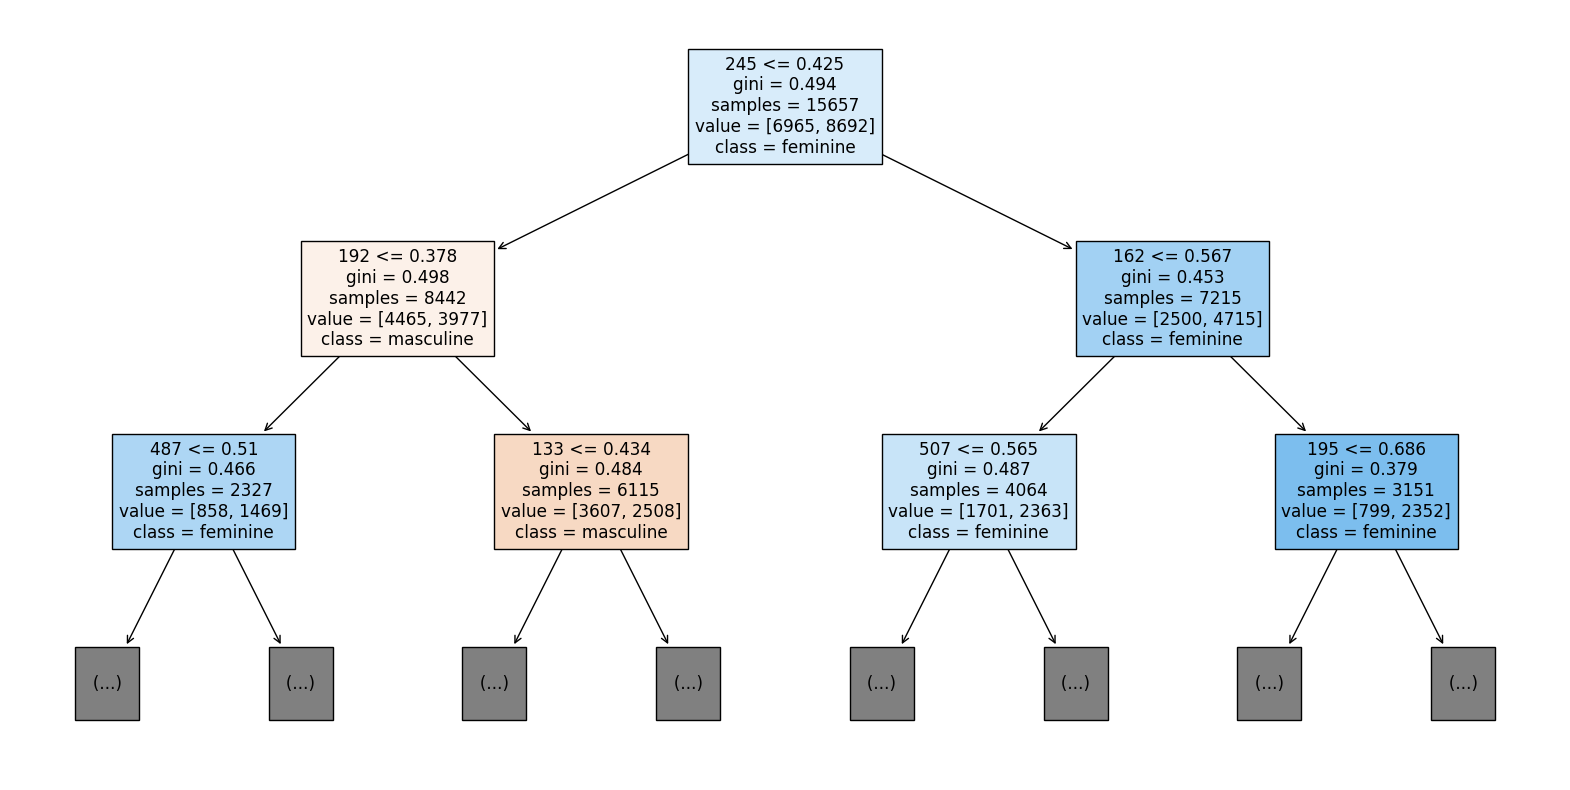

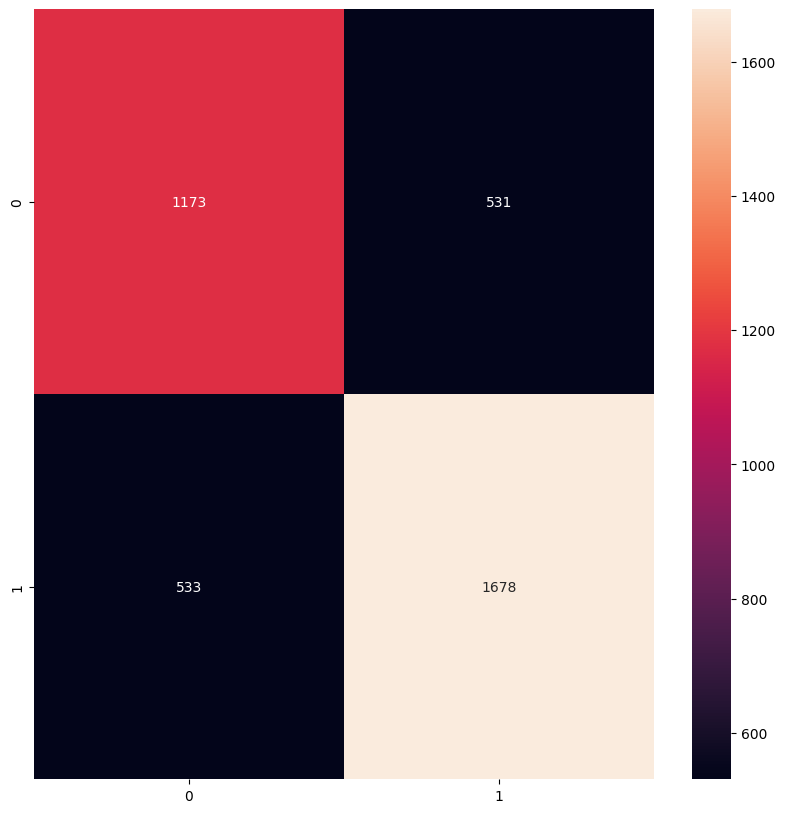

In [30]:
for i in range(3):

    print(f"Experiment {i+1}:\n")

    # Plot top 10 most important features
    indices = np.argsort(dt_results[i]["importances"])[::-1]
    print(f"Most important features:")
    for ind in [int(ind) for ind in indices[:10]]:
        print(f"-{ind}: {dt_results[i]['importances'][ind]}")

    # Plot precision, recall, F1 score and accuracy
    print(f"\nPrecision: {dt_results[i]['precision']}")
    print(f"Recall: {dt_results[i]['recall']}")
    print(f"F1 score: {dt_results[i]['f1']}")
    print(f"Accuracy: {dt_results[i]['accuracy']}")

    # Plot the tree
    plt.figure(figsize=(20,10))
    plot_tree(dt_results[i]["tree"], max_depth=2, feature_names=X_gd_N.columns, class_names=["masculine", "feminine"], filled=True)
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(10,10))
    sns.heatmap(dt_results[i]["cm"], annot=True, fmt="d")
    plt.show()



In [31]:
# Check if some important features are the same for multiple experiments

nouns = set(np.argsort(dt_results[0]["importances"])[::-1][:10])
adj = set(np.argsort(dt_results[1]["importances"])[::-1][:10])
both = set(np.argsort(dt_results[2]["importances"])[::-1][:10])

nouns_and_ajd = nouns.intersection(adj)
nouns_and_both = nouns.intersection(both)
adj_and_both = adj.intersection(both)
all = nouns_and_ajd.intersection(both)

print(f"nouns and adj: {nouns_and_ajd}")
print(f"nouns and both: {nouns_and_both}")
print(f"adj and both: {adj_and_both}")
print(f"all: {all}")

nouns and adj: {250, 5}
nouns and both: {162, 195, 245}
adj and both: {507}
all: set()


#### 2. Random Forest

In [32]:
# Do the same with Random Forest Classifier
# Execution time: ~ 2.15 min
rf_results = []

for i in range(3):

    X_train, X_test, Y_train, Y_test = train_features[i], test_features[i], train_targets[i], test_targets[i]

    # Build a random forest classifier with 100 trees
    clf = RandomForestClassifier(random_state=42, n_estimators=100)
    clf.fit(X_train, Y_train)

    # Predict gender on the test set
    Y_pred = clf.predict(X_test)

    # Build a confusion matrix
    rf_results.append ({"cm": confusion_matrix(Y_test, Y_pred)})

    # Compute precision, recall, F1 score and accuracy
    rf_results[i]["precision"] = rf_results[i]["cm"][0,0] / (rf_results[i]["cm"][0,0] + rf_results[i]["cm"][1,0])
    rf_results[i]["recall"] = rf_results[i]["cm"][0,0] / (rf_results[i]["cm"][0,0] + rf_results[i]["cm"][0,1])
    rf_results[i]["f1"] = 2 * rf_results[i]["precision"] * rf_results[i]["recall"] / (rf_results[i]["precision"] + rf_results[i]["recall"])
    rf_results[i]["accuracy"] = (rf_results[i]["cm"][0,0] + rf_results[i]["cm"][1,1]) / np.sum(rf_results[i]["cm"])

    # Store the importance of each feature
    rf_results[i]["importances"] = clf.feature_importances_
    

1.0


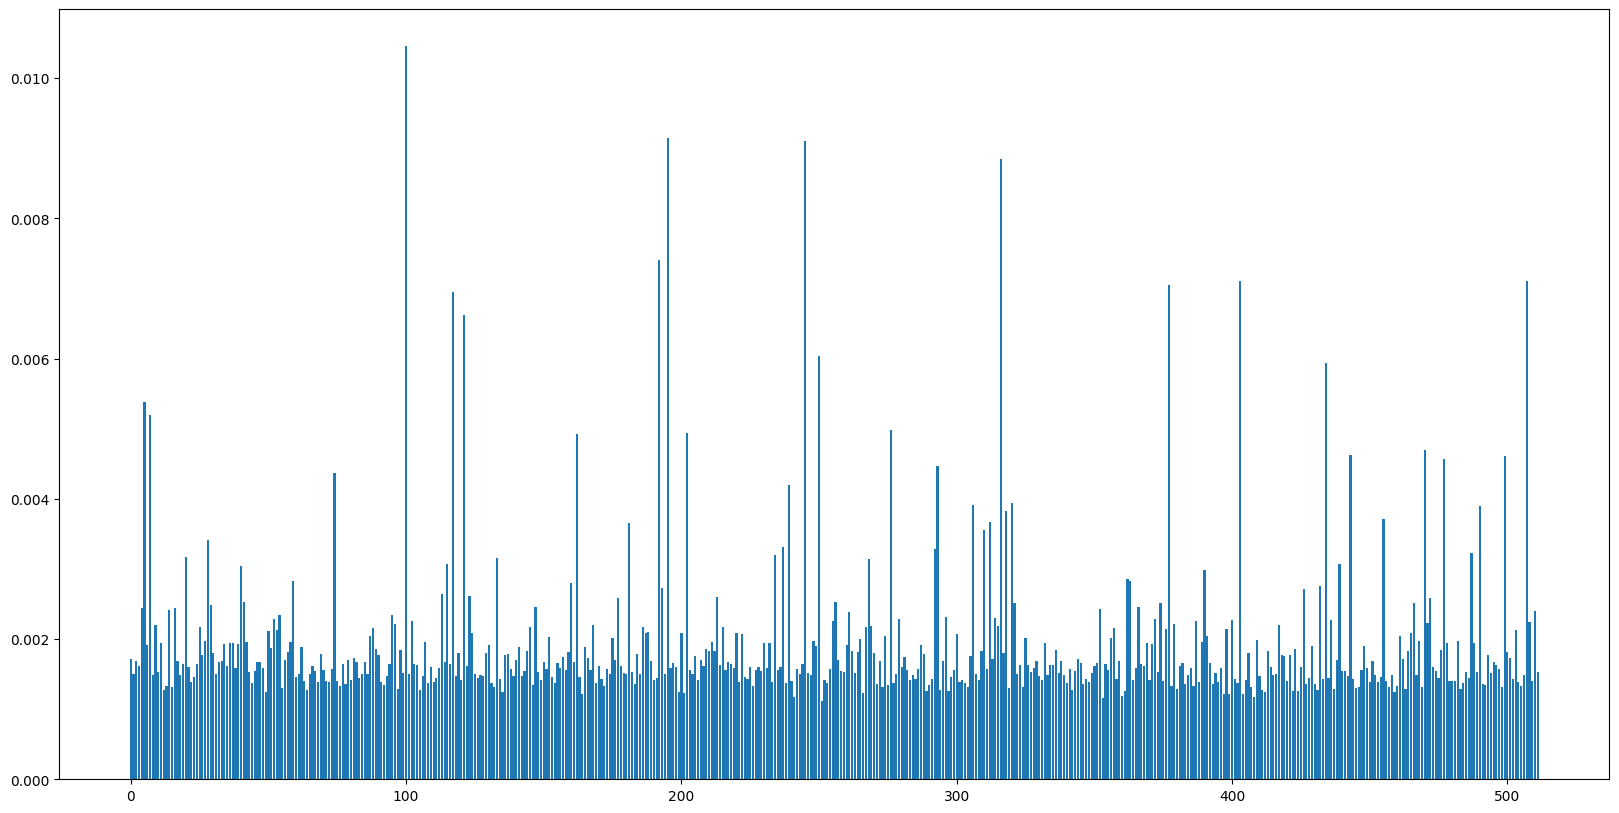

In [33]:
exp0importances_rf = rf_results[0]["importances"]

# plot the importances
plt.figure(figsize=(20,10))
plt.bar(range(len(exp0importances_rf)), exp0importances_rf)

# compute the sum of importances
print(sum(exp0importances_rf))

Experiment 1:

Most important features:
-100: 0.010460937977659956
-195: 0.009144237574816961
-245: 0.00910567158024835
-316: 0.008850744638776803
-192: 0.007404031690353832
-403: 0.0071103746344895104
-507: 0.007110331077779573
-377: 0.00705565186277876
-117: 0.006950759657578498
-121: 0.006624330288986893
Precision: 0.819038642789821
Recall: 0.6974317817014446
F1 score: 0.753359341135674
Accuracy: 0.7851208459214502


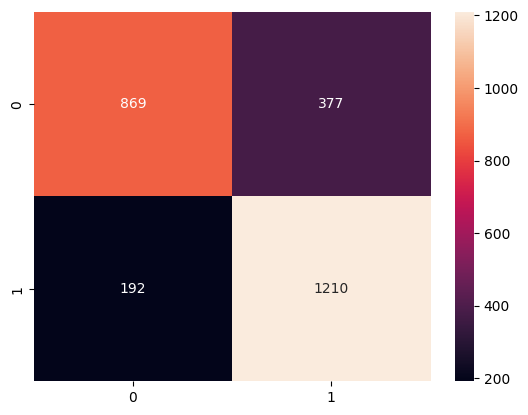

Experiment 2:

Most important features:
-466: 0.023495287435244143
-503: 0.018119116105778182
-250: 0.017713812867362705
-439: 0.017405285205009145
-245: 0.015428770305326254
-133: 0.01524639583391232
-234: 0.013535590388604263
-121: 0.01253365695470211
-432: 0.012377611244136624
-38: 0.011358911219627444
Precision: 0.9670886075949368
Recall: 0.8076109936575053
F1 score: 0.880184331797235
Accuracy: 0.9179163378058406


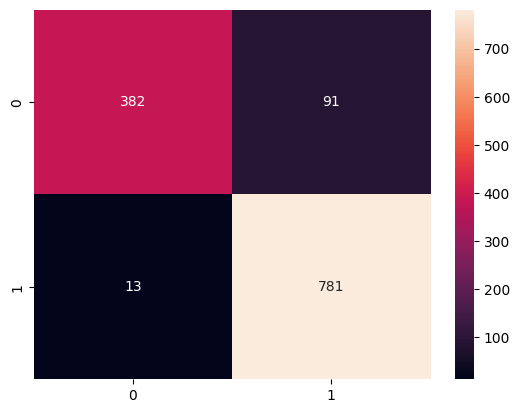

Experiment 3:

Most important features:
-245: 0.01102182924703533
-507: 0.009798516560122117
-192: 0.009716475760742437
-121: 0.009463250956061152
-250: 0.00822745173303382
-195: 0.008161713132844138
-377: 0.0072352142574062615
-5: 0.007231475639761343
-466: 0.007153198815705446
-133: 0.00654402871584062
Precision: 0.8794373744139317
Recall: 0.7705399061032864
F1 score: 0.8213950578667499
Accuracy: 0.8541507024265645


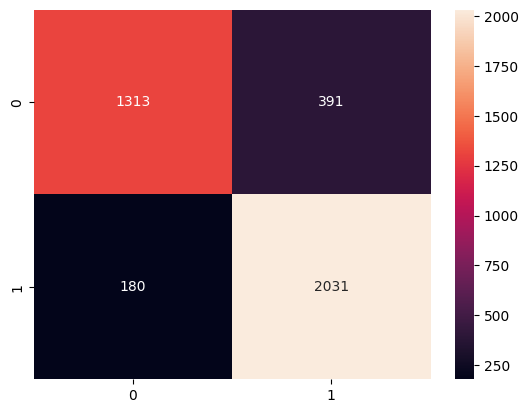

In [36]:
for i in range(3):

    print(f"Experiment {i+1}:\n")

    # Plot top 10 most important features
    indices = np.argsort(rf_results[i]["importances"])[::-1]
    print(f"Most important features:")
    for ind in [int(ind) for ind in indices[:10]]:
        print(f"-{ind}: {rf_results[i]['importances'][ind]}")

    # Plot precision, recall, F1 score and accuracy
    print(f"Precision: {rf_results[i]['precision']}")
    print(f"Recall: {rf_results[i]['recall']}")
    print(f"F1 score: {rf_results[i]['f1']}")
    print(f"Accuracy: {rf_results[i]['accuracy']}")

    # Plot confusion matrix
    sns.heatmap(rf_results[i]["cm"], annot=True, fmt="d")
    plt.show()


In [37]:
# Check if some important features are the same for multiple experiments

nouns = set(np.argsort(rf_results[0]["importances"])[::-1][:10])
adj = set(np.argsort(rf_results[1]["importances"])[::-1][:10])
both = set(np.argsort(rf_results[2]["importances"])[::-1][:10])

nouns_and_ajd = nouns.intersection(adj)
nouns_and_both = nouns.intersection(both)
adj_and_both = adj.intersection(both)
all = nouns_and_ajd.intersection(both)

print(f"nouns and adj: {nouns_and_ajd}")
print(f"nouns and both: {nouns_and_both}")
print(f"adj and both: {adj_and_both}")
print(f"all: {all}")

nouns and adj: {121, 245}
nouns and both: {192, 121, 195, 245, 377, 507}
adj and both: {133, 466, 245, 121, 250}
all: {121, 245}


#### 3. Logistic Regression

In [38]:
lr_results = []

for i in range(3):
    
    X_train, X_test, Y_train, Y_test = train_features[i], test_features[i], train_targets[i], test_targets[i]

    # define a Logistic Regression model
    clf = LogisticRegression(random_state=42, max_iter=1000)

    # fit the model to the train set
    clf.fit(X_train, Y_train)

    # predict the test set
    Y_pred = clf.predict(X_test)

    # Build a confusion matrix
    lr_results.append ({"cm": confusion_matrix(Y_test, Y_pred)})

    # Compute precision, recall, F1 score and accuracy
    lr_results[i]["precision"] = lr_results[i]["cm"][0,0] / (lr_results[i]["cm"][0,0] + lr_results[i]["cm"][1,0])
    lr_results[i]["recall"] = lr_results[i]["cm"][0,0] / (lr_results[i]["cm"][0,0] + lr_results[i]["cm"][0,1])
    lr_results[i]["f1"] = 2 * lr_results[i]["precision"] * lr_results[i]["recall"] / (lr_results[i]["precision"] + lr_results[i]["recall"])
    lr_results[i]["accuracy"] = (lr_results[i]["cm"][0,0] + lr_results[i]["cm"][1,1]) / np.sum(lr_results[i]["cm"])
   
    # Store the importance of each feature
    lr_results[i]["importances"] = clf.coef_[0]

-2.9253243142503713


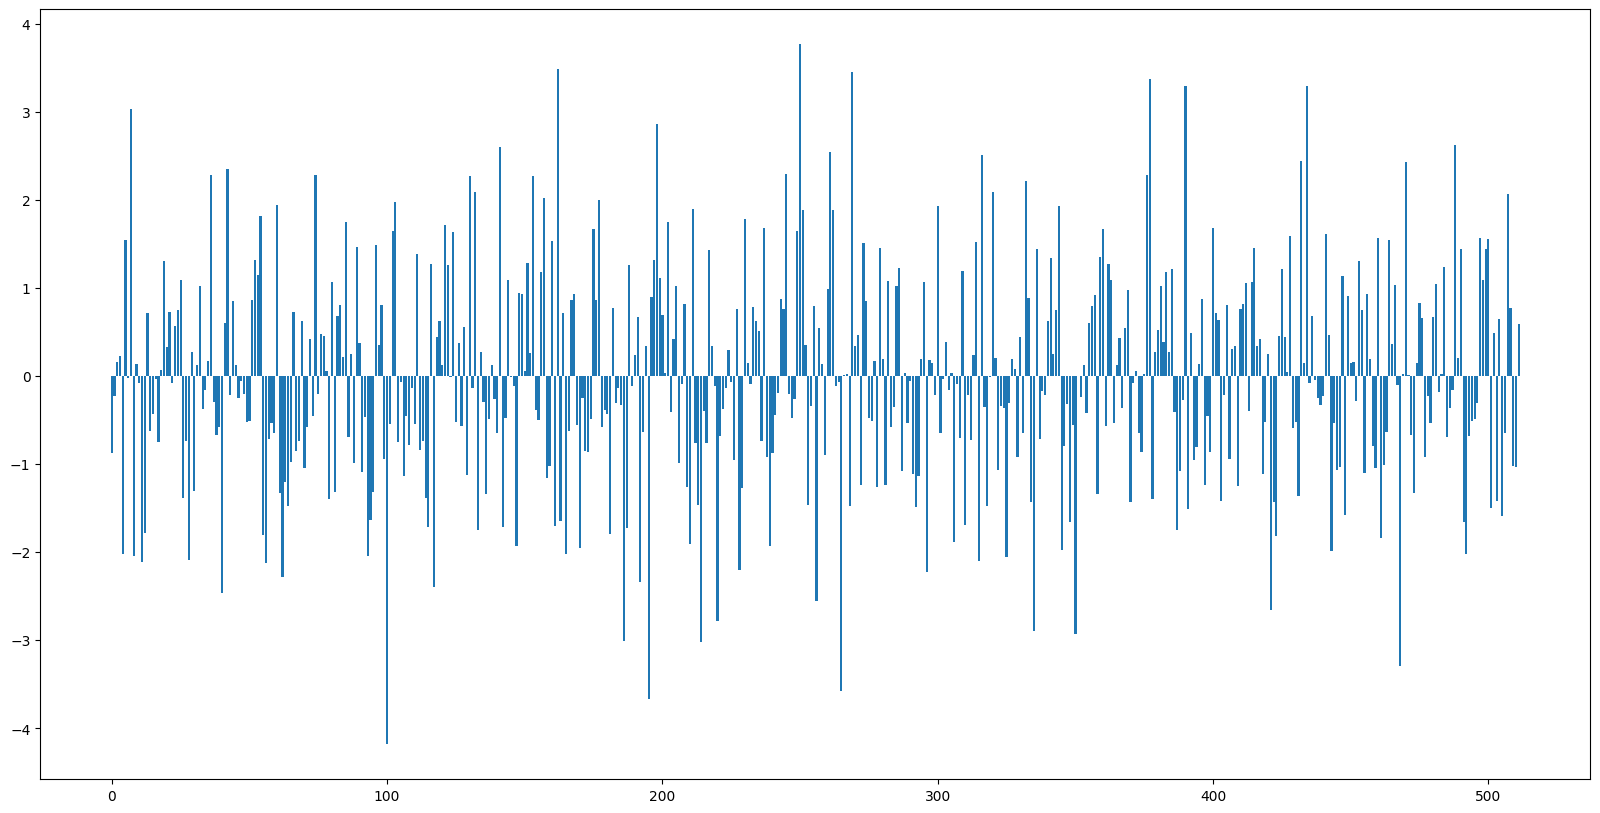

In [39]:
importances_1 = lr_results[0]["importances"]
# plot the importances
plt.figure(figsize=(20,10))
plt.bar([x for x in range(len(importances_1))], importances_1)
print(importances_1[350])

In [40]:
indices = np.argsort(abs(lr_results[0]["importances"]))[::-1]
print(f"Most important features: {[int(ind) for ind in indices[:10]]}")

Most important features: [100, 250, 195, 265, 162, 269, 377, 390, 434, 468]


Experiment 1:

-100: -4.181341300418833
-250: 3.7692878952983
-195: -3.670885196818569
-265: -3.574088543637242
-162: 3.4831101325231737
-269: 3.457125905564225
-377: 3.373407602315331
-390: 3.2980937539608797
-434: 3.2931435562704294
-468: -3.291832218756526
Precision: 0.9587044534412955
Recall: 0.9502407704654896
F1 score: 0.954453849254333
Accuracy: 0.9573262839879154


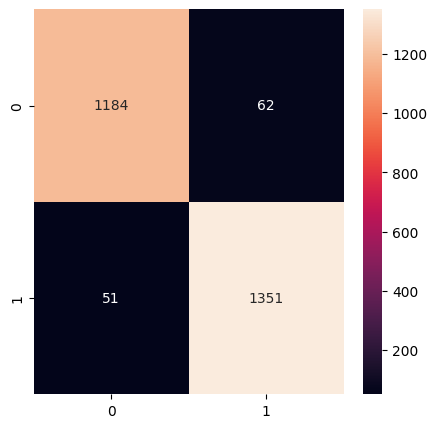

Experiment 2:

-250: 2.621692819036566
-121: 2.4847669673473955
-162: 2.240865371215638
-390: 2.170863005294551
-88: -2.160690048199569
-89: 2.059317555160326
-432: 1.9991583196281928
-177: 1.8905257751812556
-175: 1.8902288654658137
-245: 1.8708686984361051
Precision: 0.9957173447537473
Recall: 0.9830866807610994
F1 score: 0.9893617021276596
Accuracy: 0.9921073401736386


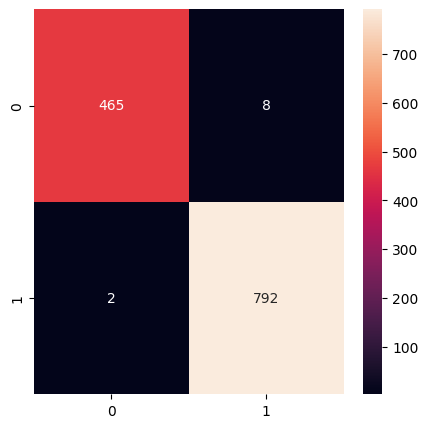

Experiment 3:

-250: 4.535614737930763
-162: 3.9980794952041574
-100: -3.9579729524871867
-195: -3.8977652566175833
-269: 3.8085209344584503
-390: 3.7961986285039915
-214: -3.6876025659596885
-265: -3.653654926458511
-468: -3.5106471850328873
-377: 3.5062561145534703
Precision: 0.9636038186157518
Recall: 0.9477699530516432
F1 score: 0.9556213017751479
Accuracy: 0.9616858237547893


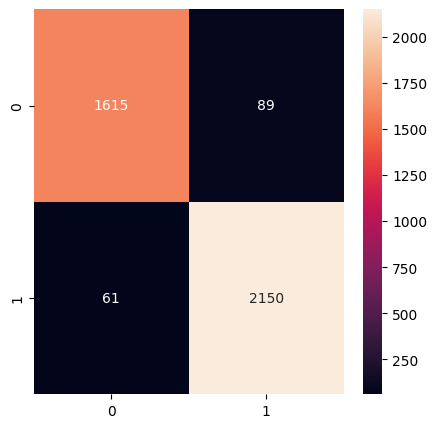

In [42]:
for i in range(3):

    print(f"Experiment {i+1}:\n")
    
    # Plot top 10 most important features
    indices = np.argsort(abs(lr_results[i]["importances"]))[::-1]
    for ind in [int(ind) for ind in indices[:10]]:
        print(f"-{ind}: {lr_results[i]['importances'][ind]}")

    # Plot precision, recall, F1 score and accuracy
    print(f"Precision: {lr_results[i]['precision']}")
    print(f"Recall: {lr_results[i]['recall']}")
    print(f"F1 score: {lr_results[i]['f1']}")
    print(f"Accuracy: {lr_results[i]['accuracy']}")
    
    # Plot confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(lr_results[i]["cm"], annot=True, fmt="d")
    plt.show()


## Number

In [44]:
df_nouns_nb = pd.read_csv('../Data/FlauBERT_WE/all_nouns_we.csv').drop(columns=["gender"])
df_adj_nb = pd.read_csv('../Data/FlauBERT_WE/all_adjectives_we.csv').drop(columns=["gender"])
df_both_nb = pd.concat([df_nouns_nb, df_adj_nb], ignore_index=True)

# assign 0 for singular and 1 for plural
df_nouns_nb.loc[df_nouns_nb['number']=="singular",'num']=0
df_nouns_nb.loc[df_nouns_nb['number']=="plural",'num']=1

df_adj_nb.loc[df_adj_nb['number']=="singular",'num']=0
df_adj_nb.loc[df_adj_nb['number']=="plural",'num']=1


df_both_nb.loc[df_both_nb['number']=="singular",'num']=0
df_both_nb.loc[df_both_nb['number']=="plural",'num']=1


# target : number
Y_nb_N = df_nouns_nb["num"]
Y_nb_A = df_adj_nb["num"]
Y_nb_both = df_both_nb["num"]

# features : word embeddings dimensions
X_nb_N = df_nouns_nb.drop(columns=["Word", "number", "num"])
X_nb_A = df_adj_nb.drop(columns=["Word", "number", "num"])
X_nb_both = df_both_nb.drop(columns = ["Word","number", "num"] )

# normalize data to be between 0 and 1
X_nb_N = (X_nb_N - X_nb_N.min()) / (X_nb_N.max() - X_nb_N.min())
X_nb_A = (X_nb_A - X_nb_A.min()) / (X_nb_A.max() - X_nb_A.min())
X_nb_both = (X_nb_both - X_nb_both.min()) / (X_nb_both.max() - X_nb_both.min())

# split data into train and test sets
X_nb_N_train, X_nb_N_test, Y_nb_N_train, Y_nb_N_test = train_test_split(X_nb_N, Y_nb_N, test_size=0.2, random_state=42)
X_nb_A_train, X_nb_A_test, Y_nb_A_train, Y_nb_A_test = train_test_split(X_nb_A, Y_nb_A, test_size=0.2, random_state=42)
X_nb_both_train, X_nb_both_test, Y_nb_both_train, Y_nb_both_test = train_test_split(X_nb_both, Y_nb_both, test_size=0.2, random_state=42)

In [45]:
train_nb_features = [X_nb_N_train, X_nb_A_train, X_nb_both_train]
test_nb_features = [X_nb_N_test, X_nb_A_test, X_nb_both_test]
train_nb_targets = [Y_nb_N_train, Y_nb_A_train, Y_nb_both_train]
test_nb_targets = [Y_nb_N_test, Y_nb_A_test, Y_nb_both_test]

In [46]:
# print shapes of train and test sets
print("X_nb_N_train shape : ", X_nb_N_train.shape)
print("X_nb_N_test shape : ", X_nb_N_test.shape)
print("X_nb_A_train shape : ", X_nb_A_train.shape)
print("X_nb_A_test shape : ", X_nb_A_test.shape)
print("X_nb_both_train shape : ", X_nb_both_train.shape)
print("X_nb_both_test shape : ", X_nb_both_test.shape)

X_nb_N_train shape :  (10590, 512)
X_nb_N_test shape :  (2648, 512)
X_nb_A_train shape :  (5067, 512)
X_nb_A_test shape :  (1267, 512)
X_nb_both_train shape :  (15657, 512)
X_nb_both_test shape :  (3915, 512)


In [54]:
X_nb_N.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.563279,0.340119,0.507748,0.659445,0.367968,0.339893,0.549996,0.515584,0.644780,0.698492,...,0.478445,0.690549,0.346463,0.580677,0.506598,0.393464,0.229733,0.367052,0.485763,0.564754
1,0.529382,0.588048,0.493383,0.337152,0.482471,0.205503,0.399195,0.543197,0.259220,0.497491,...,0.570467,0.527998,0.377310,0.355903,0.477766,0.323570,0.444101,0.350788,0.700718,0.608173
2,0.603549,0.570092,0.562908,0.477118,0.461051,0.277103,0.525756,0.641025,0.541734,0.566504,...,0.526154,0.543085,0.363160,0.468561,0.374276,0.235144,0.273112,0.430418,0.460310,0.624340
3,0.548645,0.309364,0.563848,0.486993,0.708502,0.253776,0.385085,0.415046,0.356847,0.566966,...,0.626972,0.225125,0.630578,0.703307,0.481221,0.344804,0.341001,0.753027,0.373303,0.415185
4,0.553901,0.511615,0.702909,0.513628,0.493881,0.340918,0.468666,0.190584,0.872077,0.767871,...,0.530039,0.771501,0.395695,0.478692,0.557922,0.540039,0.407749,0.594698,0.697615,0.442955


### LogisticRegression

In [49]:
lr_results = []

for i in range(3):
    
    X_train, X_test, Y_train, Y_test = train_nb_features[i], test_nb_features[i], train_nb_targets[i], test_nb_targets[i]

    # define a Logistic Regression model
    clf = LogisticRegression(random_state=42, max_iter=1000)

    # fit the model to the train set
    clf.fit(X_train, Y_train)

    # predict the test set
    Y_pred = clf.predict(X_test)

    # Build a confusion matrix
    lr_results.append ({"cm": confusion_matrix(Y_test, Y_pred)})

    # Compute precision, recall, F1 score and accuracy
    lr_results[i]["precision"] = lr_results[i]["cm"][0,0] / (lr_results[i]["cm"][0,0] + lr_results[i]["cm"][1,0])
    lr_results[i]["recall"] = lr_results[i]["cm"][0,0] / (lr_results[i]["cm"][0,0] + lr_results[i]["cm"][0,1])
    lr_results[i]["f1"] = 2 * lr_results[i]["precision"] * lr_results[i]["recall"] / (lr_results[i]["precision"] + lr_results[i]["recall"])
    lr_results[i]["accuracy"] = (lr_results[i]["cm"][0,0] + lr_results[i]["cm"][1,1]) / np.sum(lr_results[i]["cm"])
   
    # Store the importance of each feature
    lr_results[i]["importances"] = clf.coef_[0]

Experiment 1:

-310: -4.014502240846294
-54: -3.1284032232387258
-208: 2.7776184256079635
-384: 2.6345570957361777
-359: 2.6183939131779543
-158: -2.5958251568867095
-81: 2.4979921603317154
-285: -2.431749365081227
-182: -2.3438405251597922
-172: -2.3271890422409736
Precision: 0.9936452917388793
Recall: 0.9936452917388793
F1 score: 0.9936452917388793
Accuracy: 0.9916918429003021


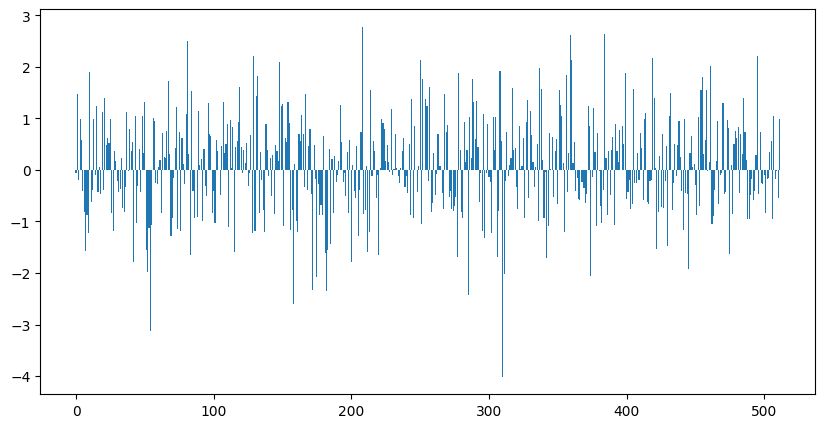

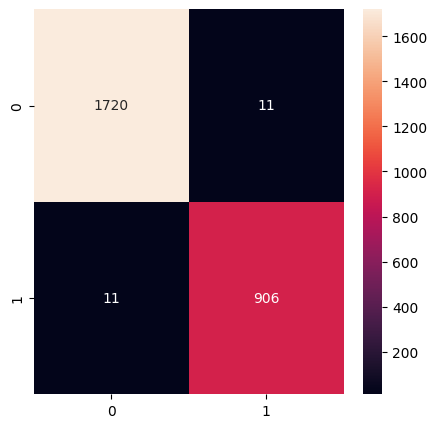

Experiment 2:

-310: -3.648976641330268
-54: -2.4961680560121797
-384: 2.372844730279462
-359: 2.2140647283966866
-285: -2.1273903938938292
-81: 2.1162936497885956
-200: -2.0637911480041877
-360: 2.0380913142859365
-455: 1.8649421113669213
-192: 1.8636452204915888
Precision: 0.9962406015037594
Recall: 0.9949937421777222
F1 score: 0.9956167814652473
Accuracy: 0.994475138121547


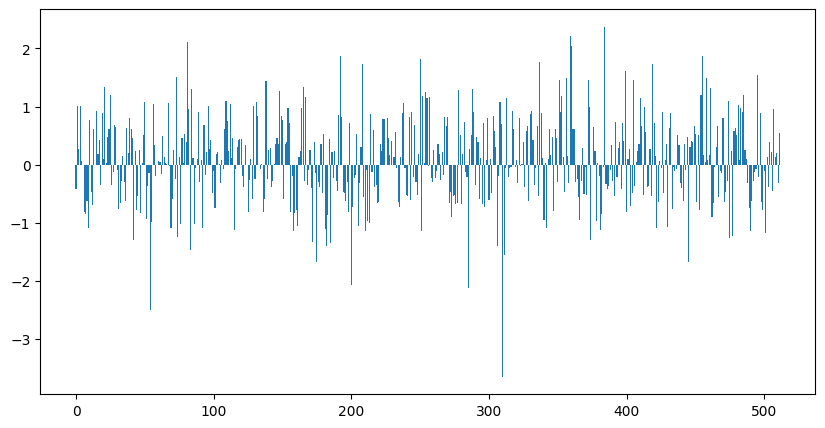

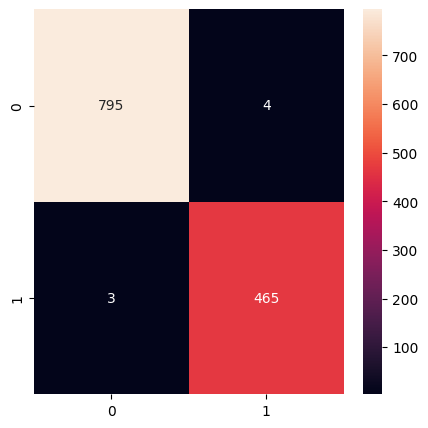

Experiment 3:

-310: -4.728950874367662
-54: -3.6187900445333208
-384: 3.2641555714867834
-208: 3.1510652392516874
-359: 3.031403140929557
-81: 2.8863570628716673
-360: 2.6979776222438616
-182: -2.6669437221989334
-158: -2.620474972219312
-285: -2.612322223937465
Precision: 0.995249406175772
Recall: 0.9968279143536876
F1 score: 0.9960380348652932
Accuracy: 0.9948914431673053


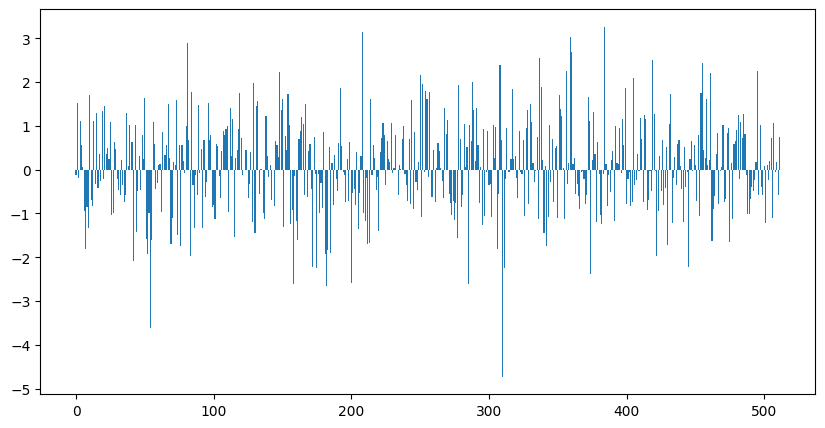

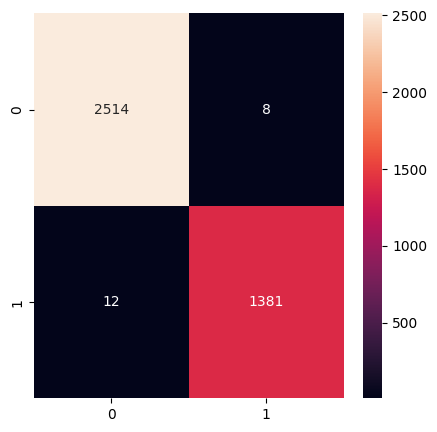

In [53]:
for i in range(3):

    print(f"Experiment {i+1}:\n")
    
    # Plot top 10 most important features
    indices = np.argsort(abs(lr_results[i]["importances"]))[::-1]
    for ind in [int(ind) for ind in indices[:10]]:
        print(f"-{ind}: {lr_results[i]['importances'][ind]}")

    # plot all the features coefficients
    plt.figure(figsize=(10,5))
    plt.bar(range(len(lr_results[i]["importances"])), lr_results[i]["importances"])

    # Plot precision, recall, F1 score and accuracy
    print(f"Precision: {lr_results[i]['precision']}")
    print(f"Recall: {lr_results[i]['recall']}")
    print(f"F1 score: {lr_results[i]['f1']}")
    print(f"Accuracy: {lr_results[i]['accuracy']}")
    
    # Plot confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(lr_results[i]["cm"], annot=True, fmt="d")
    plt.show()


### K Neighbors Classifier [yet uncorrected]

Experiment 1:



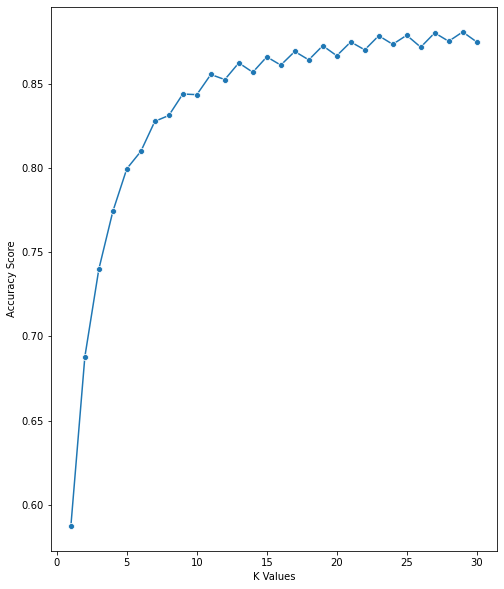

Experiment 2:



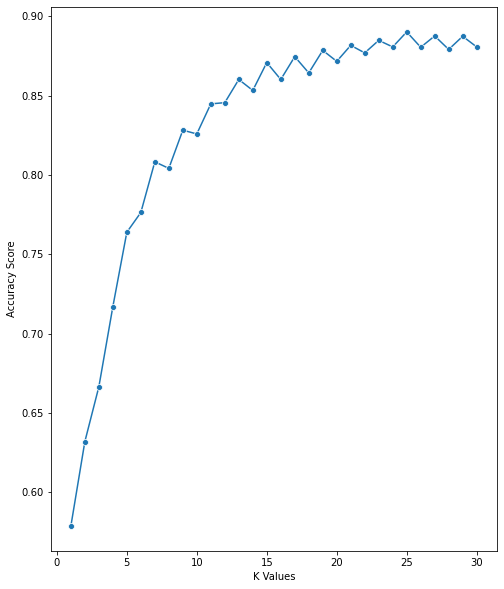

Experiment 3:



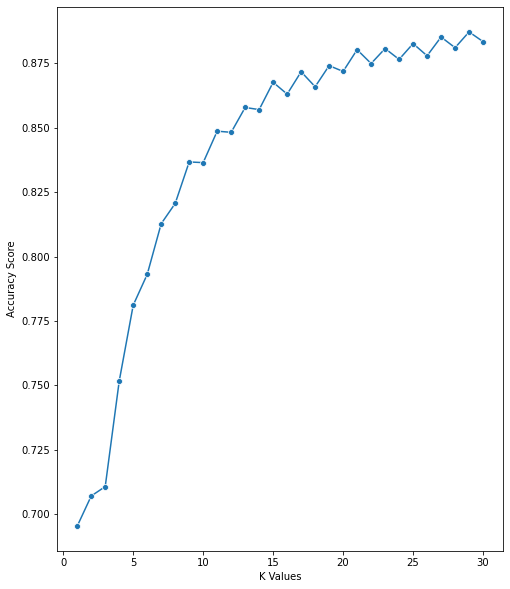

In [403]:
# Using Cross Validation to Get the Best Value of k
for t in range(3):
    
    X_train, X_test, Y_train, Y_test = train_nb_features[t], test_nb_features[t], train_nb_targets[t], test_nb_targets[t]

    k_values = [i for i in range (1,31)]
    scores = []

    scaler = StandardScaler()
    X = scaler.fit_transform( X_train)

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        score = cross_val_score(knn, X_train, Y_train, cv=5)
        scores.append(np.mean(score))

   
    print(f"Experiment {t+1}:\n")
    
    sns.lineplot(x = k_values, y = scores, marker = 'o')
    plt.xlabel("K Values")
    plt.ylabel("Accuracy Score")

    plt.show()
     
    

In [423]:
#Fitting and Evaluating the Model

# for noun the best_k is 15
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_nb_N_train, Y_nb_N_train)

y_pred = knn.predict(X_nb_N_test)

accuracy = accuracy_score(Y_nb_N_test, y_pred)
precision = precision_score(Y_nb_N_test, y_pred)
recall = recall_score(Y_nb_N_test, y_pred)

print("Accuracy for noun:", accuracy)
print("Precision for noun:", precision)
print("Recalln for noun :", recall)


# perform permutation importance
results = permutation_importance(knn, X_nb_N_train, Y_nb_N_train, scoring='accuracy')
# get importance
importance = results.importances_mean

#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()
print("--"*30)

Accuracy for noun: 0.875
Precision for noun: 0.85995085995086
Recalln for noun : 0.7633587786259542
------------------------------------------------------------


In [427]:
importances = pd.DataFrame(data={'Dimension': X_nb_N_train.columns,'Importance': results.importances_mean})
importances = importances.sort_values(by='Importance', ascending=False)
importances.head(10)

,Dimension,Importance
250,250,0.002493
384,384,0.002474
67,67,0.002285
371,371,0.002247
254,254,0.002096
155,155,0.002059
461,461,0.001926
310,310,0.001889
25,25,0.001832
172,172,0.001832


In [429]:

# for adj the best_k is 25

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_nb_A_train, Y_nb_A_train)

y_pred = knn.predict(X_nb_A_test)

accuracy = accuracy_score(Y_nb_A_test, y_pred)
precision = precision_score(Y_nb_A_test, y_pred)
recall = recall_score(Y_nb_A_test, y_pred)



print("Accuracy for adj:", accuracy)
print("Precision for adj:", precision)
print("Recalln for adj :", recall)


print("--"*30)

# for noun and adj the best_k is 27

knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_nb_both_train, Y_nb_both_train)

y_pred = knn.predict(X_nb_both_test)

accuracy = accuracy_score(Y_nb_both_test, y_pred)
precision = precision_score(Y_nb_both_test, y_pred)
recall = recall_score(Y_nb_both_test, y_pred)

print("Accuracy for noun and adj:", accuracy)
print("Precision for noun and adj:", precision)
print("Recalln for noun and  adj :", recall)





Accuracy for adj: 0.9021310181531176
Precision for adj: 0.9195121951219513
Recalln for adj : 0.8055555555555556
------------------------------------------------------------
Accuracy for noun and adj: 0.8929757343550447
Precision for noun and adj: 0.8908507223113965
Recalln for noun and  adj : 0.7968413496051687


## Part of Speech : Noun vs. Not-Noun

In [55]:
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.metrics import accuracy_score

In [64]:
# NOUN: 1, NOT-NOUN: 0
df_n_pos_we = df_nouns_we.drop(columns=['gender'])
df_n_pos_we['pos'] = [1]* len(df_n_pos_we)

df_v_pos_we = pd.read_csv('../Data/FlauBERT_WE/all_verb_we.csv')
df_v_pos_we['pos'] = [0]* len(df_v_pos_we)

df_a_pos_we = df_adj_we.drop(columns = ["gender"])
df_a_pos_we['pos'] = [0]* len(df_a_pos_we)

x_pos = pd.concat([df_n_pos_we, df_v_pos_we, df_a_pos_we], ignore_index=True).drop(columns=['Word'])
x_pos = shuffle(x_pos)
y_pos = x_pos.pos.tolist()
x_pos = np.asarray(x_pos.drop(columns=['pos']))

In [65]:
# normalize the data
x_pos = (x_pos - x_pos.min()) / (x_pos.max() - x_pos.min())
x_pos

array([[0.41424361, 0.34656176, 0.36128022, ..., 0.37039401, 0.35121353,
        0.31889122],
       [0.36981894, 0.3484191 , 0.34784727, ..., 0.33496037, 0.36403202,
        0.3539455 ],
       [0.33972729, 0.32784696, 0.33751989, ..., 0.34688664, 0.33736434,
        0.34599101],
       ...,
       [0.38827239, 0.31137733, 0.36660809, ..., 0.35724806, 0.38262961,
        0.31214196],
       [0.36720982, 0.30204896, 0.37459358, ..., 0.34885527, 0.35673929,
        0.31292243],
       [0.35268161, 0.33738438, 0.35725639, ..., 0.33794807, 0.38679615,
        0.33745539]])

In [89]:
x_pos_train, x_pos_test, y_pos_train, y_pos_test = train_test_split(x_pos, y_pos, train_size=0.8, random_state=42)

In [90]:
# print all the shapes
print(f"X_pos_train: {x_pos_train.shape}")
print(f"X_pos_test: {x_pos_test.shape}")
print(f"Y_pos_train: {len(y_pos_train)}")
print(f"Y_pos_test: {len(y_pos_test)}")

X_pos_train: (23728, 512)
X_pos_test: (5932, 512)
Y_pos_train: 23728
Y_pos_test: 5932


### Logistic regression

In [91]:
# define a Logistic Regression model
clf = LogisticRegression(random_state=42, max_iter=1000)

# fit the model to the train set
clf.fit(x_pos_train, y_pos_train)

# predict the test set
Y_pred = clf.predict(x_pos_test)

# Build a confusion matrix
cm = confusion_matrix(y_pos_test, Y_pred)

# Compute precision, recall, F1 score and accuracy
p = cm[0,0] / (cm[0,0] + cm[1,0])
r = cm[0,0] / (cm[0,0] + cm[0,1])
f = 2 * p * r / (p + r)
acc = (cm[0,0] + cm[1,1]) / np.sum(cm)

# Store the importance of each feature
imp = clf.coef_[0]

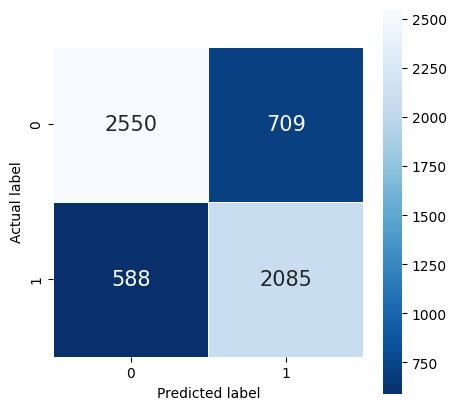

In [93]:
# plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r', annot_kws={'size':15});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


In [94]:
# print all the scores
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F1 Score: {f}")
print(f"Accuracy: {acc}")

Precision: 0.8126195028680688
Recall: 0.7824486038662166
F1 Score: 0.7972487103329687
Accuracy: 0.7813553607552259


Text(0.5, 1.0, 'Feature coefficients')

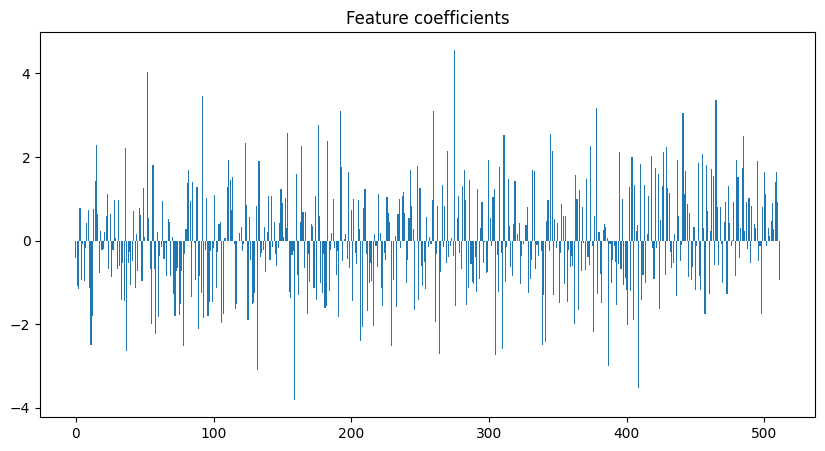

In [95]:
# plot the importance of each feature
plt.figure(figsize=(10,5))
plt.bar(range(len(imp)), imp)
plt.title("Feature coefficients")

In [96]:
# print the most important features
print("Most important features:")
for i in np.argsort(abs(imp))[::-1][:20]:
    print(f"{i}: {imp[i]}")


Most important features:
275: 4.566382227973752
52: 4.035100718622701
159: -3.806540496909568
409: -3.516219662114913
92: 3.4527703961284617
465: 3.374055125803236
378: 3.1657965023537855
192: 3.1131386853383534
260: 3.094623731197678
132: -3.090325620419495
441: 3.0518017257433847
387: -3.004101521997665
176: 2.774896796249165
305: -2.7461158748450734
264: -2.706957873423992
37: -2.642264992269407
310: -2.591935957587881
154: 2.5755572077773765
345: 2.558294501850425
311: 2.529405607456891


### SVM [yet uncorrected]

In [7]:
clf = svm.SVC(kernel='linear')

In [8]:
clf.fit(x_pos_train, y_pos_train)

SVC(kernel='linear')

In [9]:
y_pred = clf.predict(x_pos_test)
print(accuracy_score(y_pos_test, y_pred))

0.7483333333333333


In [16]:
sorted(enumerate(clf.coef_[0]), key=lambda x: x[1], reverse=True)

[(417, 0.5409311301562476),
 (258, 0.4847646425630199),
 (431, 0.4429072137082253),
 (280, 0.4373269106959907),
 (139, 0.39972676509410565),
 (445, 0.39695378487091215),
 (113, 0.38892903899776843),
 (77, 0.3666468198952657),
 (216, 0.35497250477844844),
 (455, 0.35024419710801524),
 (388, 0.34912167704625596),
 (135, 0.3385003339589021),
 (186, 0.33735766529935507),
 (132, 0.3285316077556202),
 (227, 0.3227843250228677),
 (474, 0.317719218417436),
 (393, 0.3163424382161031),
 (369, 0.3141469998216171),
 (494, 0.3097163585900251),
 (464, 0.3025802689073247),
 (93, 0.2991925619032477),
 (241, 0.28884517996889625),
 (416, 0.2852573111786567),
 (234, 0.2852298720544644),
 (467, 0.28371701197887056),
 (145, 0.2823493837626818),
 (96, 0.2822563863153098),
 (423, 0.2818033983664705),
 (501, 0.2786039779637317),
 (100, 0.27323758519879715),
 (302, 0.2704470341422911),
 (303, 0.26986809517392985),
 (67, 0.2696932299497261),
 (40, 0.26910581010022216),
 (251, 0.2685945060036845),
 (331, 0.26831

Comment: SVM runs extremely slowly and without cutting the dataset to a smaller pieces takes too long to run.
The complexity [can be](https://datascience.stackexchange.com/questions/989/svm-using-scikit-learn-runs-endlessly-and-never-completes-execution) quadratic.

Weights of SVM [can be used for feature ranking](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.70.9598&rep=rep1&type=pdf), however, since we can't efficiently run it on the dataset we don't know if the produced results are accurate enough.

# Neural Network classifier [yet uncorrected]

In [17]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics


### Part of speech

In [100]:
x_pos_train, x_pos_test, y_pos_train, y_pos_test = train_test_split(x_pos, y_pos, train_size=0.8)

In [101]:
# split an additional validation dataset
x_validation = x_pos_train[:1000]
x_partial_train = x_pos_train[1000:]
y_validation = y_pos_train[:1000]
y_partial_train = y_pos_train[1000:]

In [106]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(512,)))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [107]:
model.fit(x_partial_train, y_partial_train, epochs=4, batch_size=512 ,validation_data=(x_validation, y_validation))
print("score on test: " + str(model.evaluate(x_pos_test, y_pos_test)[1]))
print("score on train: "+ str(model.evaluate(x_pos_train, y_pos_train)[1]))

Epoch 1/4
35/35 [==============================] - 1s 8ms/step - loss: 0.5532 - accuracy: 0.7253 - val_loss: 0.4915 - val_accuracy: 0.7790
Epoch 2/4
35/35 [==============================] - 0s 4ms/step - loss: 0.4717 - accuracy: 0.7964 - val_loss: 0.4408 - val_accuracy: 0.8080
Epoch 3/4
35/35 [==============================] - 0s 4ms/step - loss: 0.4483 - accuracy: 0.8059 - val_loss: 0.4592 - val_accuracy: 0.7840
Epoch 4/4
146/146 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.7992
score on test: 0.799185574054718
584/584 [==============================] - 1s 976us/step - loss: 0.4205 - accuracy: 0.8145
score on train: 0.8145230412483215


In [125]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 16)                8208      
                                                                 
 dense_52 (Dense)            (None, 512)               8704      
                                                                 
 dense_53 (Dense)            (None, 1)                 513       
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [108]:
sorted(enumerate(np.asarray(model.layers[2].weights[0])), key=lambda x: x[1], reverse=True)

[(297, array([0.12163994], dtype=float32)),
 (402, array([0.12039344], dtype=float32)),
 (351, array([0.11420713], dtype=float32)),
 (324, array([0.11387264], dtype=float32)),
 (178, array([0.1113931], dtype=float32)),
 (445, array([0.11082896], dtype=float32)),
 (155, array([0.11074799], dtype=float32)),
 (25, array([0.11038055], dtype=float32)),
 (229, array([0.11007375], dtype=float32)),
 (190, array([0.10988786], dtype=float32)),
 (84, array([0.10858683], dtype=float32)),
 (384, array([0.10766837], dtype=float32)),
 (433, array([0.1073969], dtype=float32)),
 (440, array([0.10619191], dtype=float32)),
 (295, array([0.10595679], dtype=float32)),
 (18, array([0.10356557], dtype=float32)),
 (120, array([0.10279904], dtype=float32)),
 (212, array([0.10218962], dtype=float32)),
 (12, array([0.10137595], dtype=float32)),
 (143, array([0.10040676], dtype=float32)),
 (435, array([0.09856194], dtype=float32)),
 (457, array([0.09845425], dtype=float32)),
 (20, array([0.09812693], dtype=float3

Can the weights be attributed to the dimension?

# Random forest [yet uncorrected]

### Part of speech 

In [121]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=60, max_depth=9)

In [122]:
rf.fit(x_pos_train, y_pos_train)
print("score on test: " + str(rf.score(x_pos_test, y_pos_test)))
print("score on train: "+ str(rf.score(x_pos_train, y_pos_train)))

score on test: 0.7537505357908273
score on train: 0.847588424437299


In [123]:
sorted(enumerate(np.asarray(rf.feature_importances_)), key=lambda x: x[1], reverse=True)

[(480, 0.038346231279515544),
 (159, 0.03493922462569707),
 (458, 0.024597661064683713),
 (310, 0.02424541149362095),
 (346, 0.019173789200295263),
 (341, 0.018461181201076253),
 (401, 0.018248255460852306),
 (192, 0.017001016245957727),
 (128, 0.015529468558993998),
 (29, 0.013545842752770753),
 (65, 0.01337117292773579),
 (305, 0.012715014446833657),
 (504, 0.012375727778835546),
 (409, 0.01237257664382202),
 (479, 0.011632846708457923),
 (374, 0.010029268252042584),
 (198, 0.009410576135894856),
 (362, 0.009263668817363022),
 (89, 0.008629212405998687),
 (31, 0.007321913209176185),
 (155, 0.007231274273057816),
 (378, 0.007147325073707478),
 (158, 0.006927281391111501),
 (393, 0.006786314755110686),
 (103, 0.006399778012522297),
 (185, 0.006317580583334805),
 (462, 0.006246731397365603),
 (57, 0.006221229268359195),
 (282, 0.0062183356697612605),
 (14, 0.006013723350192964),
 (168, 0.0059348334948712),
 (154, 0.005708186253188366),
 (207, 0.005667623656459511),
 (51, 0.0056019324983

This one actually gives similar results to clustering / correlation tests, however, feature importance are pretty low.